Bangladeshi Pitha Recognizer The goal of this project is to classify 20 traditional Bangladeshi Pitha varieties,preserving and celebrating the country’s rich culinary heritage.

Pitha Types:

1. Bhapa Pitha
2. Chitoi Pitha
3. Tel er Pitha
4. Nakshi Pitha
5. Bibikhana Pitha
6. Puli Pitha
7. Patisapta Pitha
8. Choi Pitha
9. Khejur Pitha
10. Dudh Chitoi Pitha
11. Bini Pitha
12. Pata Pitha
13. Jhinuk Pitha
14. Mera Pitha
15. Chita Pitha
16. Dudh Puli Pitha
17. Fuljhuri Pitha
18. Semai Pitha
19. Dim Shundori Pitha
20. Atikka Pitha


In [ ]:
%matplotlib inline
bs = 32 # batch size


In [ ]:
# ! pip uninstall -y fastprogress
# ! pip install "fastprogress==1.0.3"

In [ ]:
!pip install -Uqq fastai fastbook nbdev ddgs==9.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Pitha Recognizer

/content/drive/My Drive/Pitha Recognizer


In [ ]:
pitha_labels = [
"bhapa pitha",
"chitoi pitha",
"teler pitha",
"nokshi pitha",
"bibikhana pitha",
"puli pitha",
"patisapta pitha",
"choi pitha",
"khejur pitha",
"dudh chitoi pitha",
"binni chaler pitha",
"Pata Pitha (Leaf-shaped Pitha)",
"jhinuk pitha",
"mera pitha",
"Chita Pitha",
"dudh puli pitha",
"fuljhuri pitha",
"semai pitha",
"dim shundori pitha",
"atikka pitha"
]
len(pitha_labels)

20

In [ ]:
from ddgs import DDGS
import time

def DDG_search_images(term, min_images=200):
  """
  term: term we are searching for
  min_images: minimum number of images to be downloaded
  """
  results = []
  for page_no in range(1, 50): # continue to traverse pages until we get the target no of image urls
    responses = DDGS().images(
        query=term,
        region="us-en",
        safesearch="off",
        timelimit="y",
        max_results=min_images,
        page = page_no,
        backend="auto",
    )
    results.extend(responses)
    if len(results) >= min_images: break

  image_urls = [result['image'] for result in results]
  return image_urls

In [ ]:
images = DDG_search_images(pitha_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 255 -- One Image URL => https://www.shutterstock.com/shutterstock/photos/2605180911/display_1500/stock-photo-bhapa-pitha-a-traditional-steamed-cake-from-bangladesh-and-the-eastern-part-of-india-a-popular-2605180911.jpg'

In [ ]:
dest = "bhapa pitha.jpg"
download_url(images[0], dest, show_progress=False)

Path('bhapa pitha.jpg')

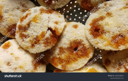

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

# Combine all of them

In [ ]:
from tqdm.notebook import tqdm # helps keep track of the progress

data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for pitha_type in tqdm(pitha_labels):

  dest = f"{data_path}/{pitha_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

#   try:
#     pitha_image_urls = DDG_search_images(pitha_type)
#     download_images(dest, urls = pitha_image_urls)

#   except:
#     continue

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2386) [Path('data/puli pitha/Image_99.jpg'),Path('data/puli pitha/Image_138 (1).jpg'),Path('data/puli pitha/Image_137 (1).jpg'),Path('data/puli pitha/Image_117.jpg'),Path('data/puli pitha/06dfc02c-d36f-450c-b5cb-e8745b54c4c4.jpg'),Path('data/puli pitha/Image_77.jpg'),Path('data/puli pitha/Image_74.jpg'),Path('data/puli pitha/Image_127 (1).jpg'),Path('data/puli pitha/Image_101.jpg'),Path('data/puli pitha/Image_168 (1).jpg'),Path('data/puli pitha/Image_104.jpg'),Path('data/puli pitha/Image_136 (1).jpg'),Path('data/puli pitha/Image_83.jpg'),Path('data/puli pitha/Image_10.jpg'),Path('data/puli pitha/Image_124 (1).jpg'),Path('data/puli pitha/Image_139 (1).jpg'),Path('data/puli pitha/Image_9.jpg'),Path('data/puli pitha/Image_118 (1).jpg'),Path('data/puli pitha/Image_80.jpg'),Path('data/puli pitha/Image_168.jpg')...]

In [ ]:
# failed = verify_images(image_counts)
# failed

# From Data to Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

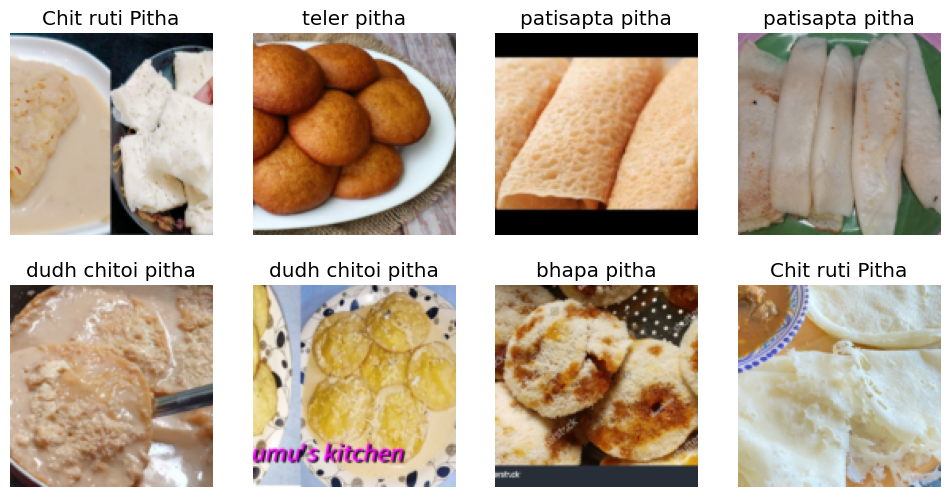

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

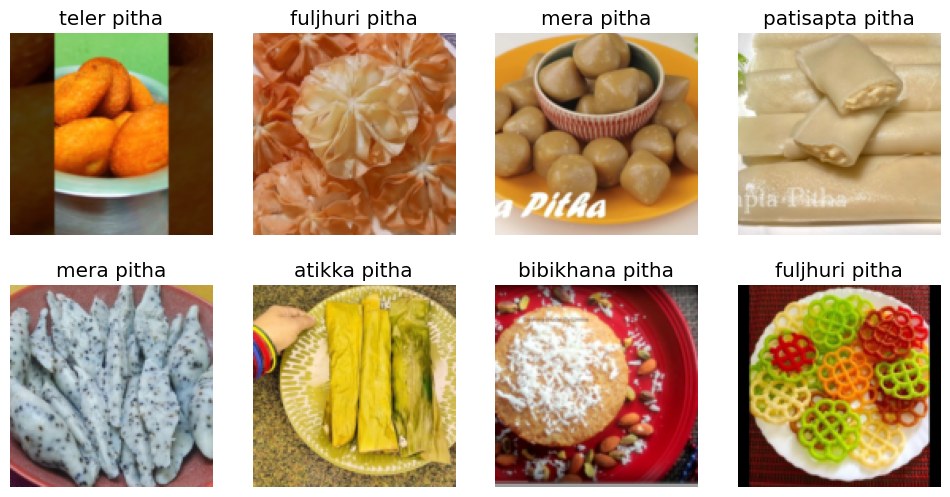

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

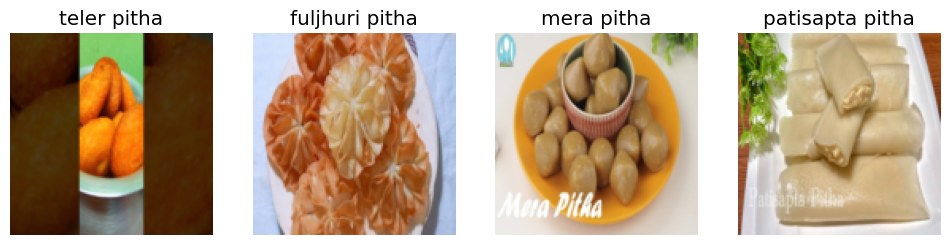

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

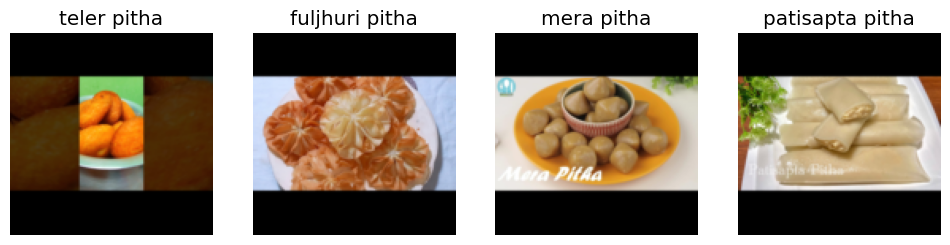

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

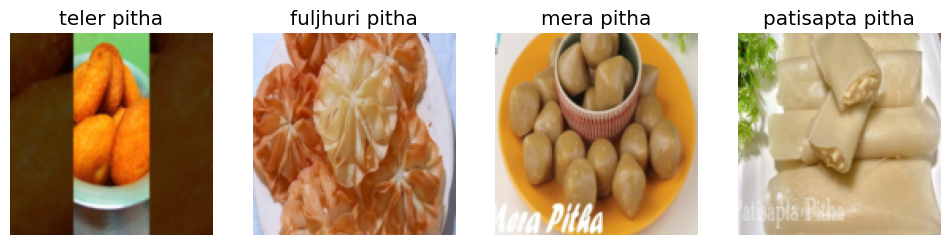

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

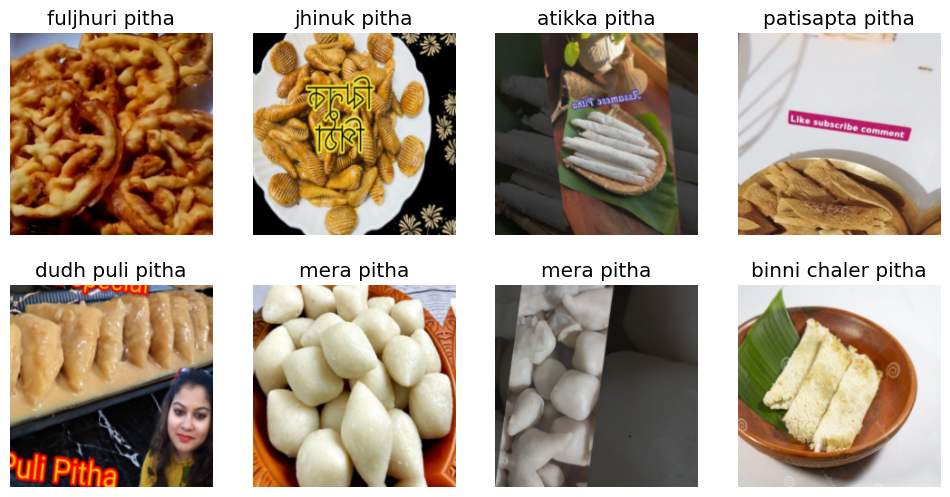

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "pitha_dataloader_v0.pkl")